In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env, gamma=0.9)
learner.show_loss_every = 1000

Creating FCNet with 4->2 dims for 4 observations and 2 actions


In [4]:
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

2150


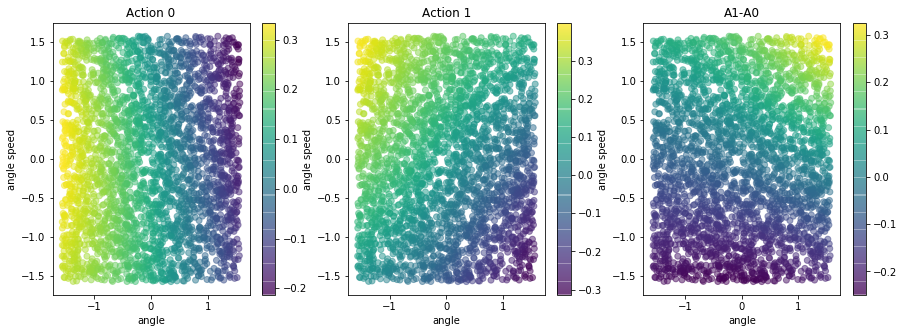

13509


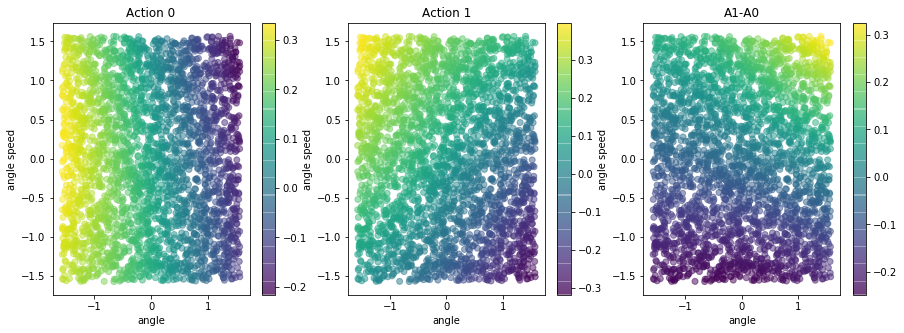

24645


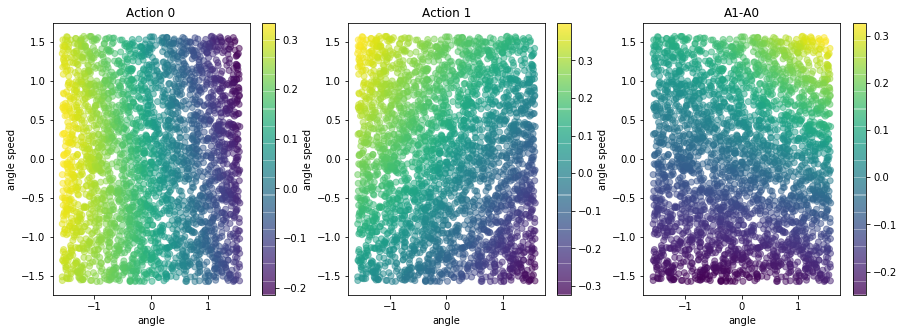

35716


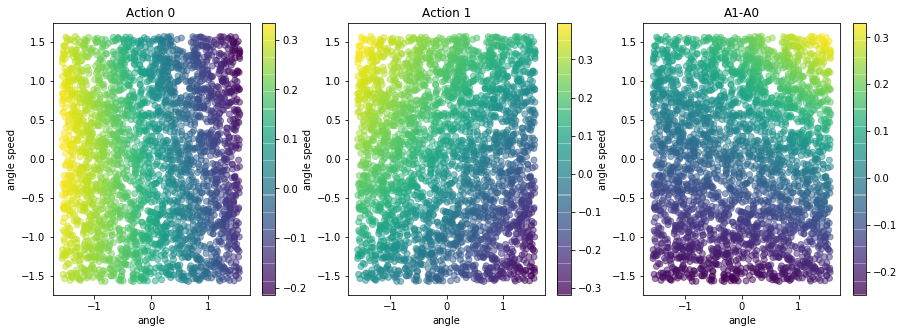

/Users/leodirac/anaconda3/envs/rl/lib/python3.6/site-packages/torch/nn/modules/loss.py:782: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


Loss = 0.59652
Loss = 0.39625
Loss = 0.35432
Loss = 0.29022
Loss = 0.21804
Loss = 0.25768
Loss = 0.43085
46652


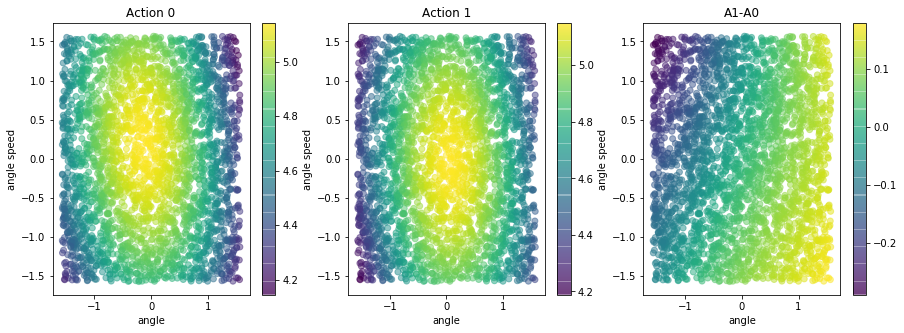

Loss = 0.23175
Loss = 0.10592
Loss = 0.49447
Loss = 0.21902
Loss = 0.37562
Loss = 0.38440
Loss = 0.03961
Loss = 0.21916
Loss = 0.21957
Loss = 0.22049
Loss = 0.22355
58092


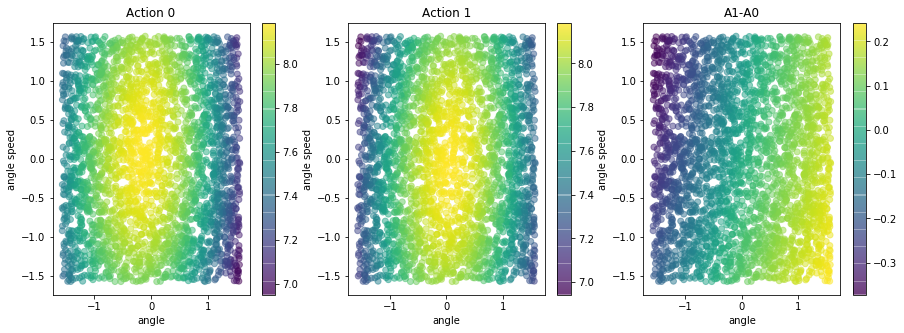

Loss = 0.84723
Loss = 0.43909
Loss = 0.22921
Loss = 0.45072
Loss = 0.90193
Loss = 0.91284
Loss = 0.46437
Loss = 0.69805
Loss = 0.47074
Loss = 0.23965
69100


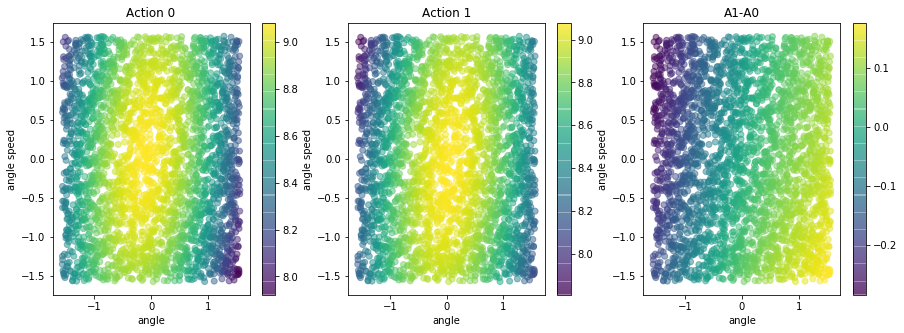

In [ ]:
learner.eps = 1
for i in tqdm(range(5000), "random warmup"):
    learner.rollout()
    if i % 500 == 99:
        print(len(learner._replay))
        helpers.plot_q(learner)

In [ ]:
N = 20
for d in range(N):
    eps = 1.0 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    helpers.plot_q(learner)

In [ ]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0)

In [ ]:
# check random
_ = helpers.rollout_score_dist(learner, 1)

In [ ]:
timebudget.report('rollout')

In [ ]:
learner.eps=0
learner.rollout(render=True)